# Projeto





# Código

In [3]:
!pip install numpy pandas scikit-learn

In [17]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
df=pd.read_csv('news.csv')

df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [9]:
labels=df.label
labels.head()

,label
0,FAKE
1,FAKE
2,REAL
3,FAKE
4,REAL


In [11]:
# separando em dataset de treino e teste
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [13]:
# Inicializando o  TfidfVectorizer - removendo stopwords e termos com frequencia maior que 0.7
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)


y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 92.82%


In [28]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[590,  48],
       [ 43, 586]])

# Matriz de Confusão

Mostra o desempenho do modelo em termos de predições corretas e incorretas.

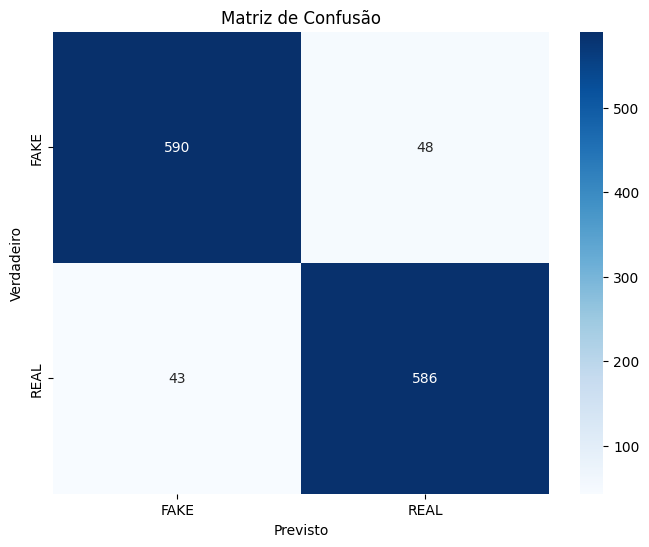

In [27]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Importância das Palavras (Pesos do TF-IDF)

Exibe as palavras mais importantes para as classes FAKE e REAL com base no TF-IDF.

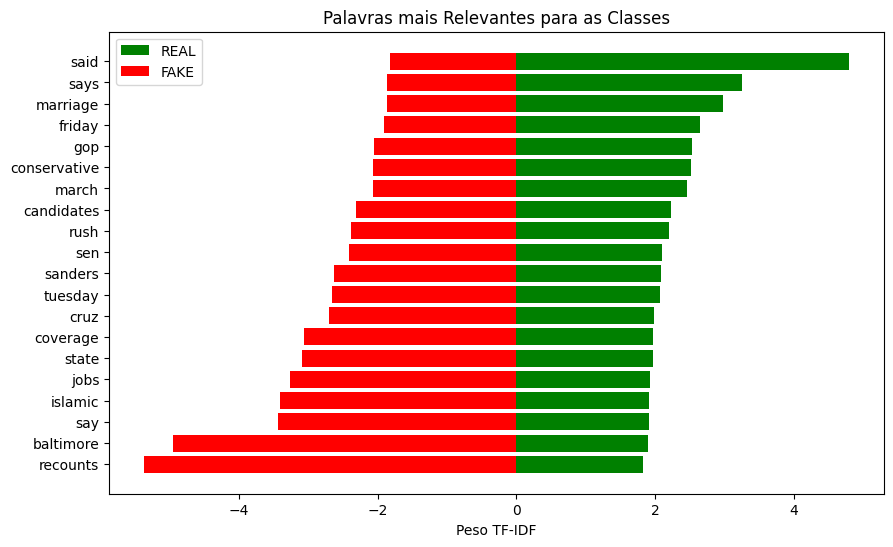

In [25]:
feature_names = tfidf_vectorizer.get_feature_names_out()

coefficients = pac.coef_[0]

top_n = 20
top_positive_indices = coefficients.argsort()[-top_n:]
top_negative_indices = coefficients.argsort()[:top_n]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), coefficients[top_positive_indices], color='green', label='REAL')
plt.barh(range(top_n), coefficients[top_negative_indices], color='red', label='FAKE')
plt.yticks(range(top_n), [feature_names[i] for i in top_positive_indices])
plt.xlabel('Peso TF-IDF')
plt.title('Palavras mais Relevantes para as Classes')
plt.legend()
plt.show()


# Wordcloud

Mostra as palavras mais frequentes nas notícias FAKE e REAL.

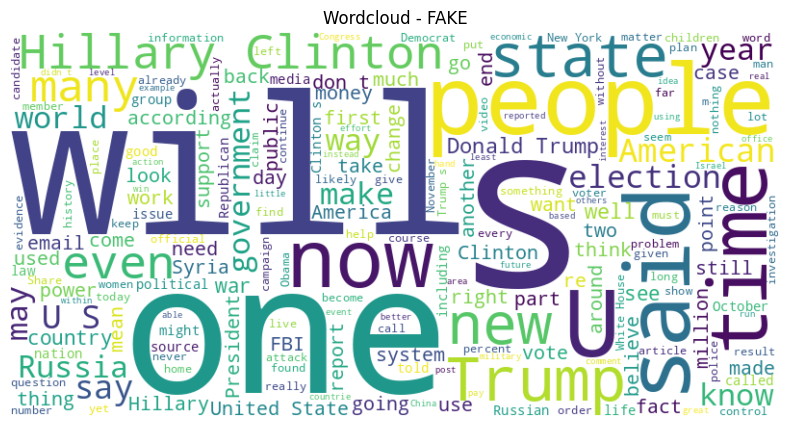

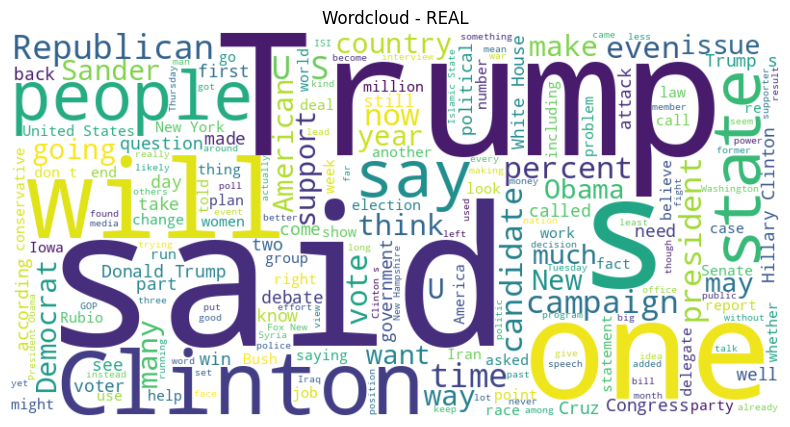

In [21]:
from wordcloud import WordCloud

fake_text = " ".join(x_train[y_train == 'FAKE'])
real_text = " ".join(x_train[y_train == 'REAL'])

# Wordcloud para FAKE
fake_wc = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud - FAKE')
plt.show()

# Wordcloud para REAL
real_wc = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud - REAL')
plt.show()


# Conclusão

O modelo apresenta um bom desempenho geral, com um número elevado de predições corretas para ambas as classes (FAKE e REAL). A acurácia geral de 92.8% reflete a capacidade do modelo de fazer classificações consistentes. Além disso:

- A classe FAKE teve 590 predições corretas e 43 incorretas, mostrando que o modelo é confiável na detecção de notícias falsas, mas ainda existem alguns casos de falsos negativos.

- A classe REAL teve 586 predições corretas e 48 incorretas, indicando que o modelo também é eficaz na identificação de notícias reais, embora algumas características das notícias reais possam ser confundidas.